In [2]:
# IMPORT THE LIBRARY 

In [3]:
import tensorflow as tf
from tensorflow.keras import models , layers
import matplotlib.pyplot as plt


In [4]:
# Decide the batch size for Input

In [5]:
Image_size = 256
Batch_size=32

In [6]:
# Import the Data set

In [7]:
   dataset=tf.keras.preprocessing.image_dataset_from_directory(
  "plant",
    shuffle =True,
    image_size = (Image_size , Image_size),
    batch_size = Batch_size
)

Found 2152 files belonging to 3 classes.


In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
# Visualize the data set

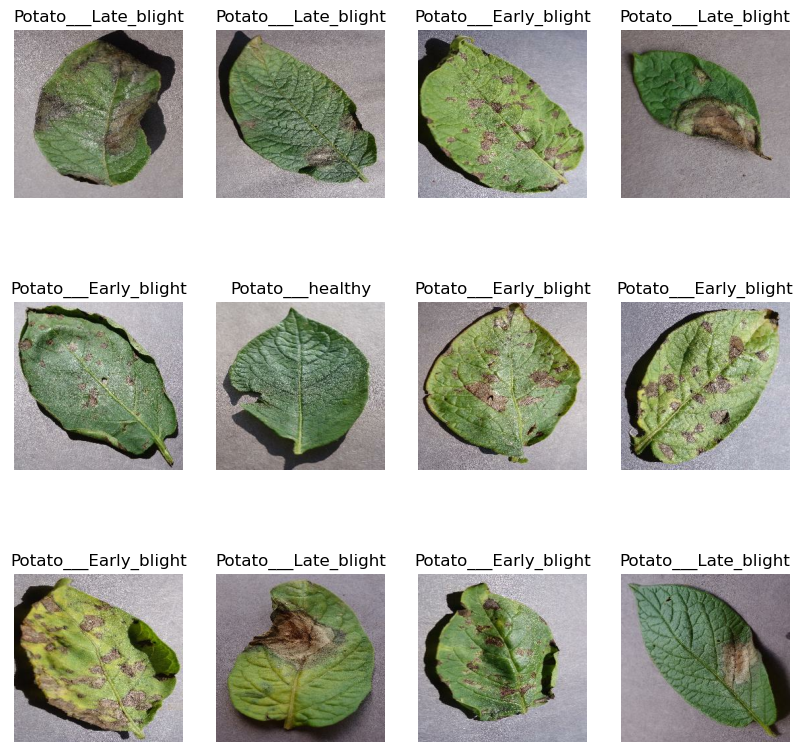

In [12]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    # print(image_batch.shape)
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    # print(label_batch.numpy())

In [13]:
# now we splitting the data 
# 80% = training 
# 20%=test
len(dataset)*0.8

54.400000000000006

In [14]:
train_ds = dataset.take(54)
len(train_ds)

54

In [15]:
remain_ds = dataset.skip(54)
len(remain_ds)

14

In [16]:
val_ds=remain_ds.take(6)
len(val_ds)

6

In [17]:
test_ds = remain_ds.skip(6)

In [18]:
# Write the function which split the dataset

In [19]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
           
    

In [20]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [21]:
len(train_ds)

54

In [22]:
len(val_ds)

6

In [23]:
# Data Augmentation and Resize and Rescale the data

In [24]:
resize_and_rescale = tf.keras.Sequential([
   layers.experimental.preprocessing.Resizing(Image_size , Image_size),
   layers.experimental.preprocessing.Rescaling(1./255), 
])

In [25]:
# Data Augmentation 
data_augmentation = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2),
    ])

In [26]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
# Write the model Architecture 

In [28]:
Channels = 3
input_shape = (Batch_size , Image_size , Image_size , Channels)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data=val_ds,
    verbose=1,
    epochs=40,
)

Epoch 1/40
54/54 [==============================] - 58s 976ms/step - loss: 0.9145 - accuracy: 0.4724 - val_loss: 0.8949 - val_accuracy: 0.6354
Epoch 2/40
54/54 [==============================] - 50s 903ms/step - loss: 0.7561 - accuracy: 0.6238 - val_loss: 0.4580 - val_accuracy: 0.8393
Epoch 3/40
54/54 [==============================] - 51s 923ms/step - loss: 0.6158 - accuracy: 0.7309 - val_loss: 0.4737 - val_accuracy: 0.7708
Epoch 4/40
54/54 [==============================] - 51s 927ms/step - loss: 0.4196 - accuracy: 0.8222 - val_loss: 0.4622 - val_accuracy: 0.8229
Epoch 5/40
54/54 [==============================] - 50s 908ms/step - loss: 0.3125 - accuracy: 0.8738 - val_loss: 0.2671 - val_accuracy: 0.8906
Epoch 6/40
54/54 [==============================] - 49s 894ms/step - loss: 0.1944 - accuracy: 0.9284 - val_loss: 0.5934 - val_accuracy: 0.7969
Epoch 7/40
54/54 [==============================] - 50s 901ms/step - loss: 0.1605 - accuracy: 0.9390 - val_loss: 0.1347 - val_accuracy: 0.9583

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)       

In [33]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 222ms/step - loss: 0.0925 - accuracy: 0.9727


In [34]:
history

In [35]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 54}

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
type(history.history['loss'])

list

In [38]:
len(history.history['loss'])

40

In [39]:
# Visualize the loss and accuracy

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

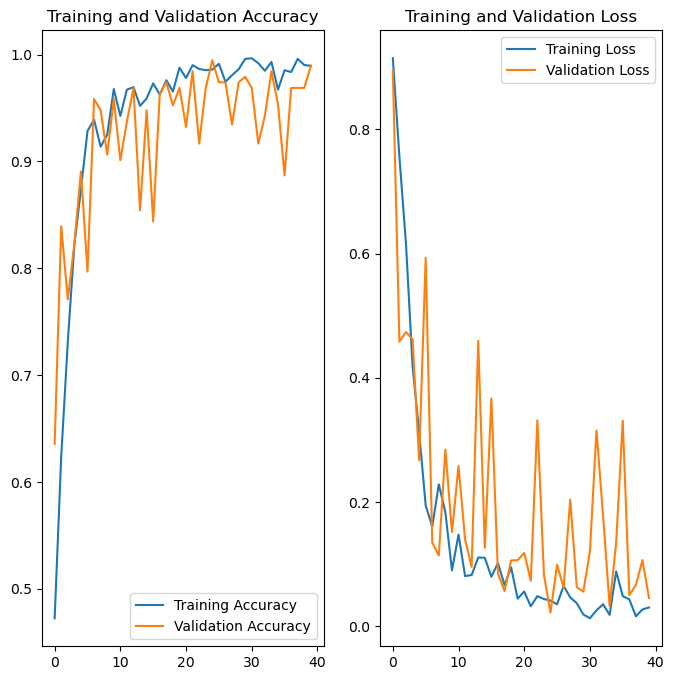

In [42]:
EPOCHS=40
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
# Prediction

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Late_blight


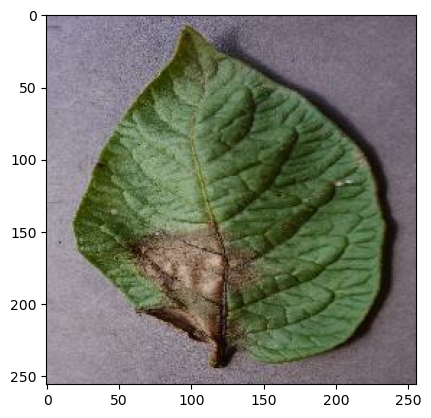

In [44]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [45]:
# Write function for inference

In [46]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 108ms/step


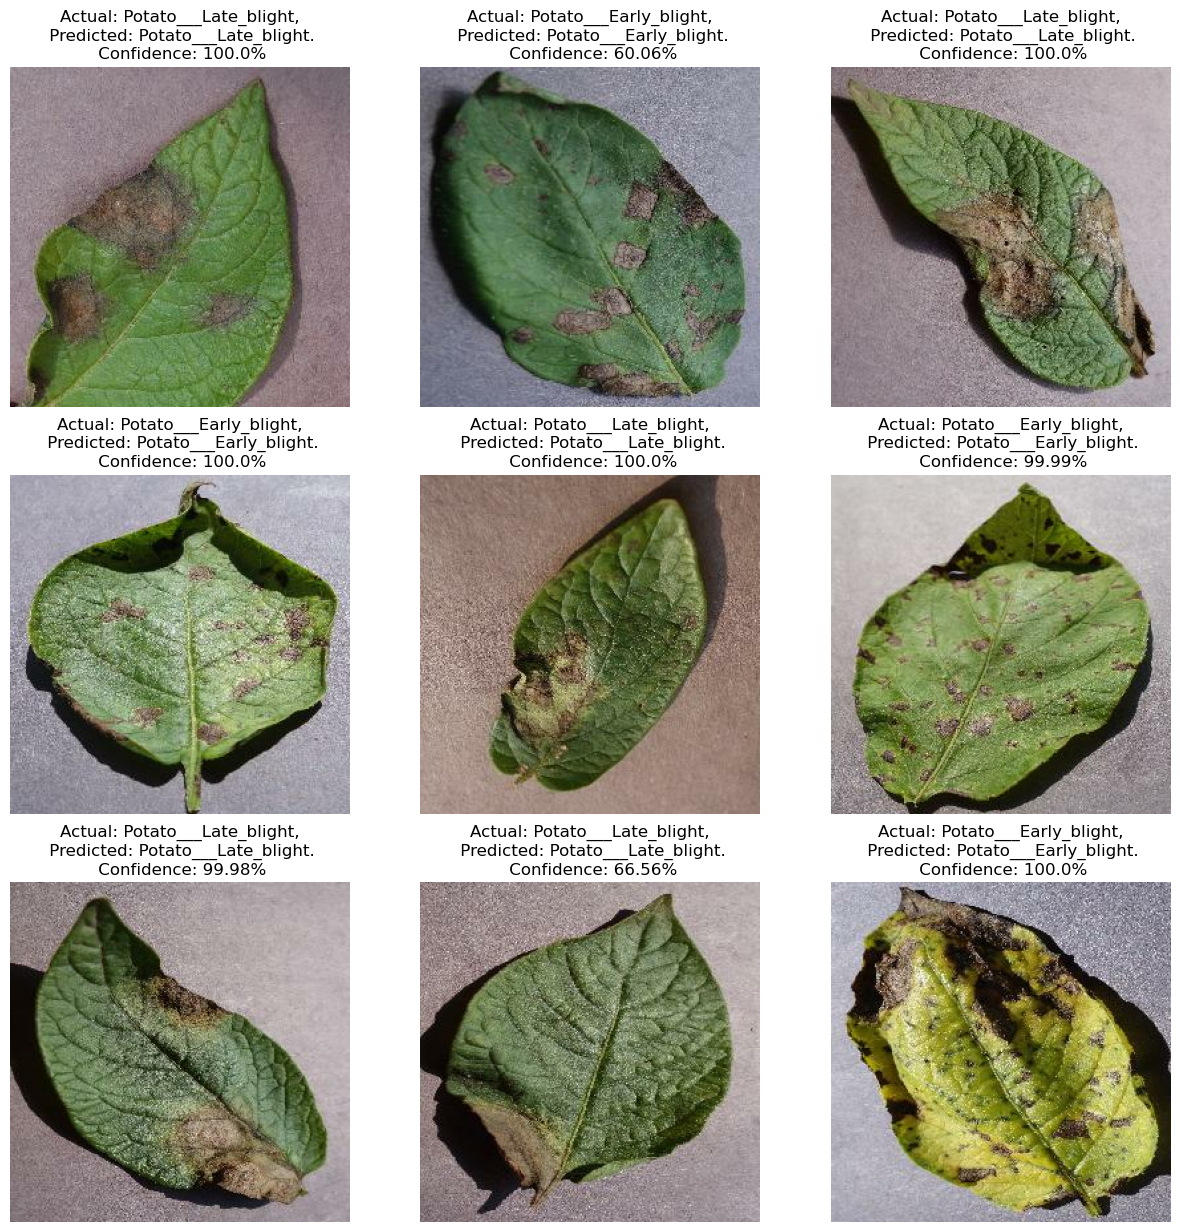

In [47]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [48]:
# Saving the Model

In [51]:
model.save("../potatoes.h6")

INFO:tensorflow:Assets written to: ../potatoes.h6\assets


INFO:tensorflow:Assets written to: ../potatoes.h6\assets
